# What makes a sequence look fake?

- Perfect repetition — too regular to be natural.
- Highly skewed 0s and 1s — unrealistic imbalance.
- Unusual runs (like too many 1s or 0s in a row).
- Very uniform patterns — like strict alternation or fixed gaps.
- Decimal numbers?
- plot 

In [1]:
sequences = {
    "a": "111011101111111101111111111011110010010011111101111101101001111100101101111111001111001100001111",
    "b": "000111001010111010101100110011100100101010010011101110011010100110000011010011110100111111101010",
    "c": "010000000011010001010011101001001111010100001100010100100100111100010110011100110110110000100101",
    "d": "010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101",
    "e": "001011010101000111101100101001011111110000101001011010100010010101011000100101011010001011101110",
    "f": "001000101101011001101101001001101101011001101010110101100110011000100010001000100010011000101101",
    "g": "011011110111000100000111101011011001010111001111111001111111010100001000111101000001101111000000",
    "h": "100111111001100110011010100111111111111111110000101000001001100110011111100110010000101000000000",
    "i": "101010100100010010010100100101001010101010010100010010101010010010101001101010011010101001000100",
    "j": "101110111011111011010100101111011101110111100100111010111011111001000100010011101011101111011110",
    "k": "011011100000100100011011010111010110000101110110001000010111110111000000011000011001110010100011",
    "l": "011100010010101110110010010101110111010110101010101010101110010100101011011101010101001110110111",
    "m": "010110011011000001110110101000110101101111110101110000000101101010010010010101001100110100101010",
    "n": "101011010101010101011010110101011100111001110101011010111011110111010111011001001010100100110110"
}


In [2]:
for label, seq in sequences.items():
    ones = seq.count('1')
    zeros = seq.count('0')
    print(f"{label}: 1s = {ones}, 0s = {zeros}, Ratio = {ones / (ones + zeros):.2f}")


a: 1s = 69, 0s = 27, Ratio = 0.72
b: 1s = 51, 0s = 45, Ratio = 0.53
c: 1s = 42, 0s = 54, Ratio = 0.44
d: 1s = 48, 0s = 48, Ratio = 0.50
e: 1s = 48, 0s = 48, Ratio = 0.50
f: 1s = 44, 0s = 52, Ratio = 0.46
g: 1s = 52, 0s = 44, Ratio = 0.54
h: 1s = 50, 0s = 46, Ratio = 0.52
i: 1s = 39, 0s = 57, Ratio = 0.41
j: 1s = 62, 0s = 34, Ratio = 0.65
k: 1s = 45, 0s = 51, Ratio = 0.47
l: 1s = 54, 0s = 42, Ratio = 0.56
m: 1s = 47, 0s = 49, Ratio = 0.49
n: 1s = 56, 0s = 40, Ratio = 0.58


a has Ratio = 0.72 (69 ones, 27 zeros) → that's very skewed.

j is also quite skewed → 0.65, but not as extreme.

d has exactly alternating 0s and 1s → visibly suspicious, even if the count is balanced.



In [3]:
import re

def longest_run(seq, char):
    return max((len(m.group()) for m in re.finditer(f"{char}+", seq)), default=0)

for label, seq in sequences.items():
    max_1s = longest_run(seq, '1')
    max_0s = longest_run(seq, '0')
    print(f"{label}: Longest run of 1s = {max_1s}, 0s = {max_0s}")


a: Longest run of 1s = 10, 0s = 4
b: Longest run of 1s = 7, 0s = 5
c: Longest run of 1s = 4, 0s = 8
d: Longest run of 1s = 1, 0s = 1
e: Longest run of 1s = 7, 0s = 4
f: Longest run of 1s = 2, 0s = 3
g: Longest run of 1s = 7, 0s = 6
h: Longest run of 1s = 17, 0s = 9
i: Longest run of 1s = 2, 0s = 3
j: Longest run of 1s = 5, 0s = 3
k: Longest run of 1s = 5, 0s = 7
l: Longest run of 1s = 3, 0s = 3
m: Longest run of 1s = 6, 0s = 7
n: Longest run of 1s = 4, 0s = 2



d → Perfect alternation (run = 1)

h → Very long run (17 of 1s)

In [4]:
for label, seq in sequences.items():
    if all(seq[i] != seq[i+1] for i in range(len(seq)-1)):
        print(f"{label} is perfectly alternating!")
    elif seq == seq[:len(seq)//2] * 2:
        print(f"{label} is repeated half-length!")


d is perfectly alternating!


In [5]:
for key, binary in sequences.items():
    decimal_value = int(binary, 2)
    print(f"{key}: {decimal_value}")

a: 73966312573462572575577928463
b: 8876749420048783081923891178
c: 19870299770527730123035339813
d: 26409387504754779197847983445
e: 14025865973722213334348309230
f: 10781715913696567778116511277
g: 34489480966432962435895008192
h: 49393812407907990891902077440
i: 52695360278011575437680552516
j: 58104397386436469470113217502
k: 34054360639189563050620460195
l: 35024632114634884179723375543
m: 27757497071042562406026104106
n: 53644094350776801744635865398


absolutely no information

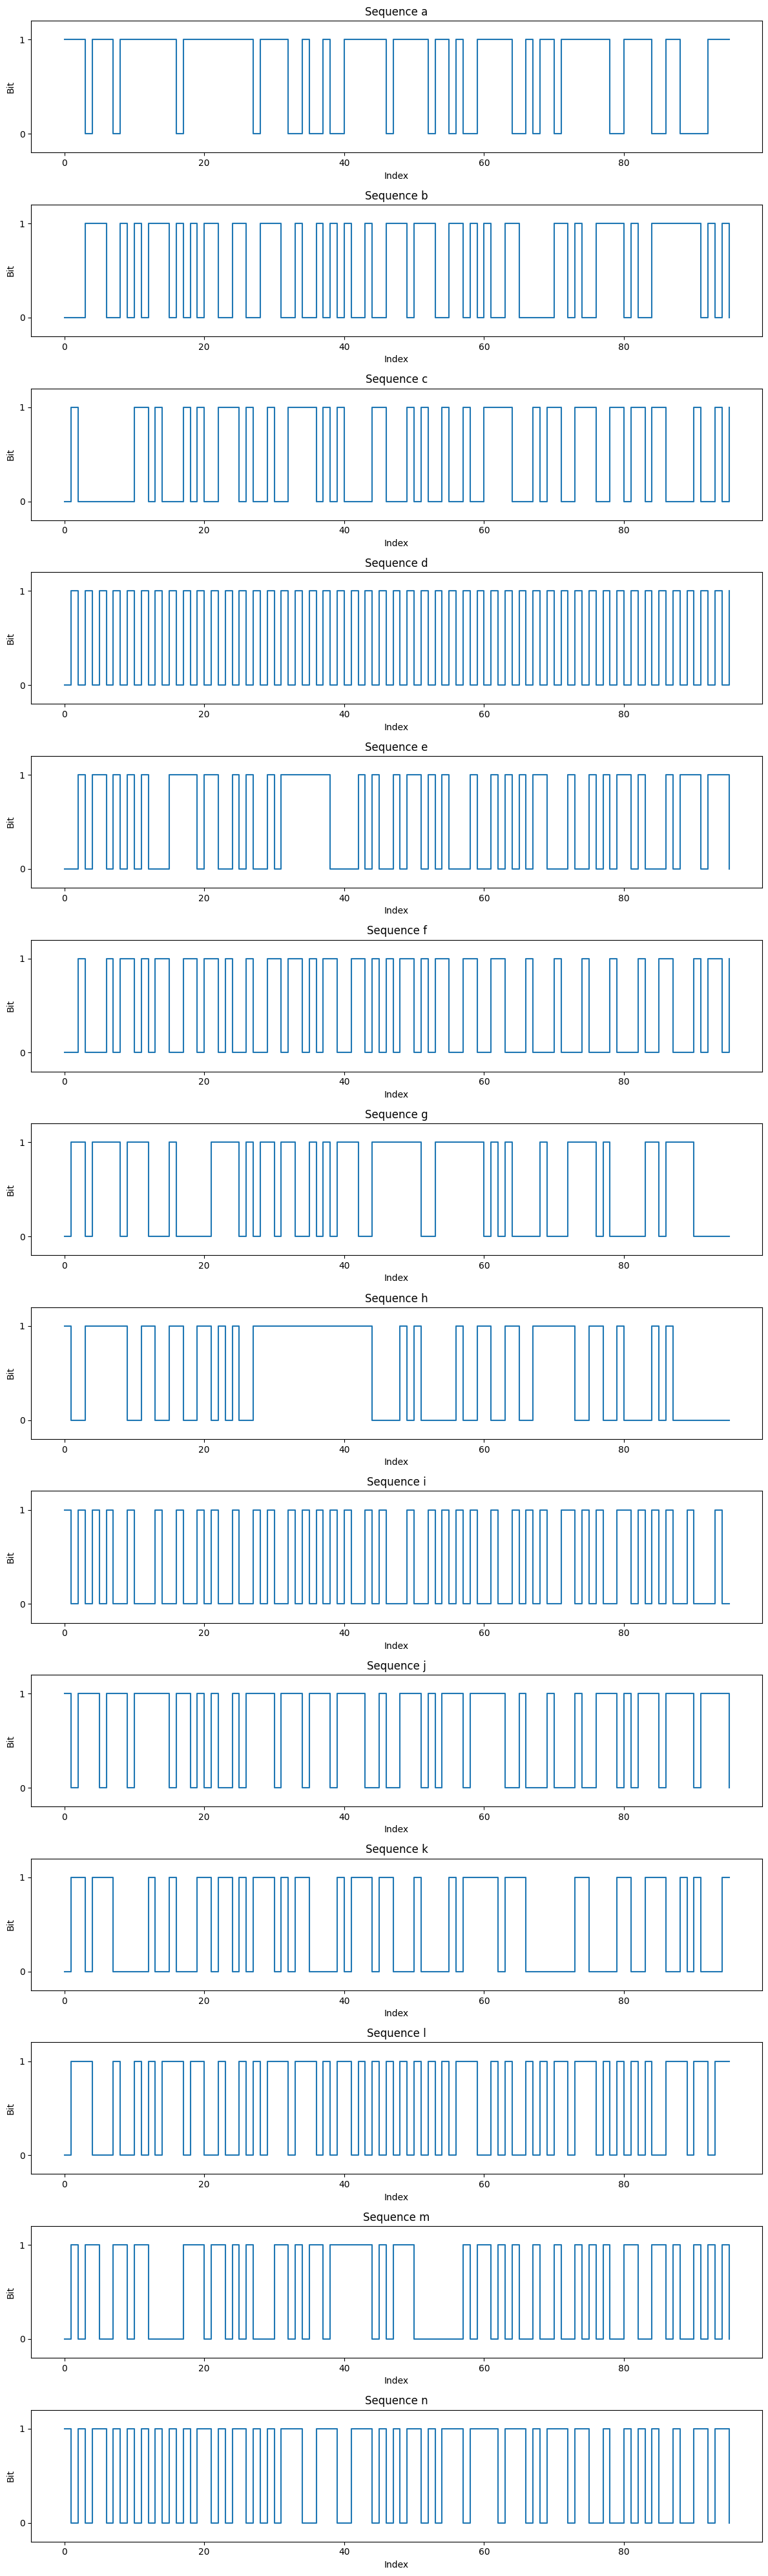

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 40))

for i, (label, seq) in enumerate(sequences.items()):
    binary = [int(bit) for bit in seq]
    plt.subplot(len(sequences), 1, i + 1)
    plt.plot(binary, drawstyle='steps-post')
    plt.title(f"Sequence {label}")
    plt.ylim(-0.2, 1.2)
    plt.yticks([0, 1])
    plt.xlabel("Index")
    plt.ylabel("Bit")

plt.tight_layout()
plt.show()

d,f,i,l are suspicious!!!